In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

# Deep autoencoder

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.models import Model
from keras.optimizers import Adam
#from keras.regularizers import activity_l1

from keras.regularizers import L1L2, l2, l1
activity_l1 = L1L2(l1=1)
activity_l2 = L1L2(l2=1)

import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
import tensorflow as tf


mnist = input_data.read_data_sets('../data/MNIST_data', one_hot=True)
X, _ = mnist.train.images, mnist.train.labels

In [60]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)


In [61]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)


In [64]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(X, X,
                epochs=100,
                batch_size=256,
                shuffle=True,
               )#validation_data=(x_test, x_test))

Epoch 1/100
55000/55000 [==============================] - 2s - loss: 0.3641      

In [65]:
X_hat =autoencoder.predict(X)

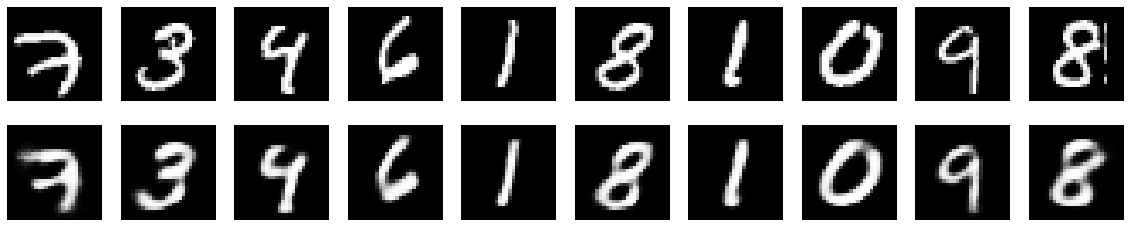

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

# Decode test images 
#decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_hat[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
